## Import Modules

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
# !pip install tensorflow
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

## Load the Dataset

In [12]:
TRAIN_DIR = 'C:/Users/asus/Desktop/ml lab/archive/train/train'
TEST_DIR = 'C:/Users/asus/Desktop/ml lab/archive/test/test'

In [13]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [15]:
def load_dataset(directory):
    image_paths = []
    labels = []
    for label in os.listdir(directory):
        for filename in os.listdir(os.path.join(directory, label)):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
    return image_paths, labels

In [16]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

,image,label
0,C:/Users/asus/Desktop/ml lab/archive/test/test...,angry
1,C:/Users/asus/Desktop/ml lab/archive/test/test...,angry
2,C:/Users/asus/Desktop/ml lab/archive/test/test...,angry
3,C:/Users/asus/Desktop/ml lab/archive/test/test...,angry
4,C:/Users/asus/Desktop/ml lab/archive/test/test...,angry


## Exploratory Data Analysis

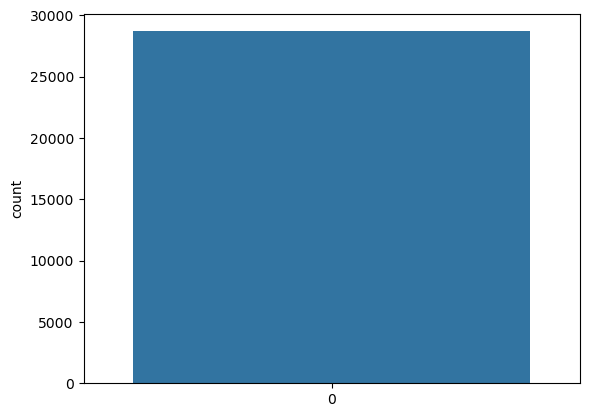

In [20]:
TRAIN_DIR = 'C:/Users/asus/Desktop/ml lab/archive/train/train'
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)

if train.shape[0] == 0:
    print("Error: The train DataFrame is empty. Please check the dataset and the loading function.")
else:
    # shuffle the dataset
    train = train.sample(frac=1).reset_index(drop=True)

    # map string labels to numerical values
    label_map = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5}
    train['label'] = train['label'].map(label_map)

    # create count plot
    sns.countplot(train['label'])

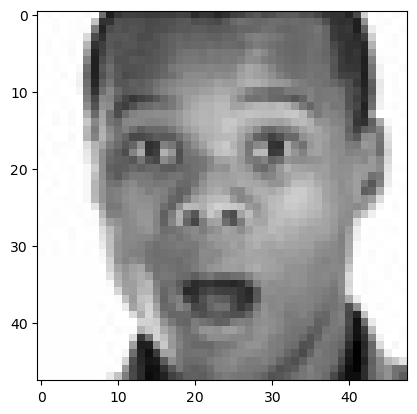

In [21]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

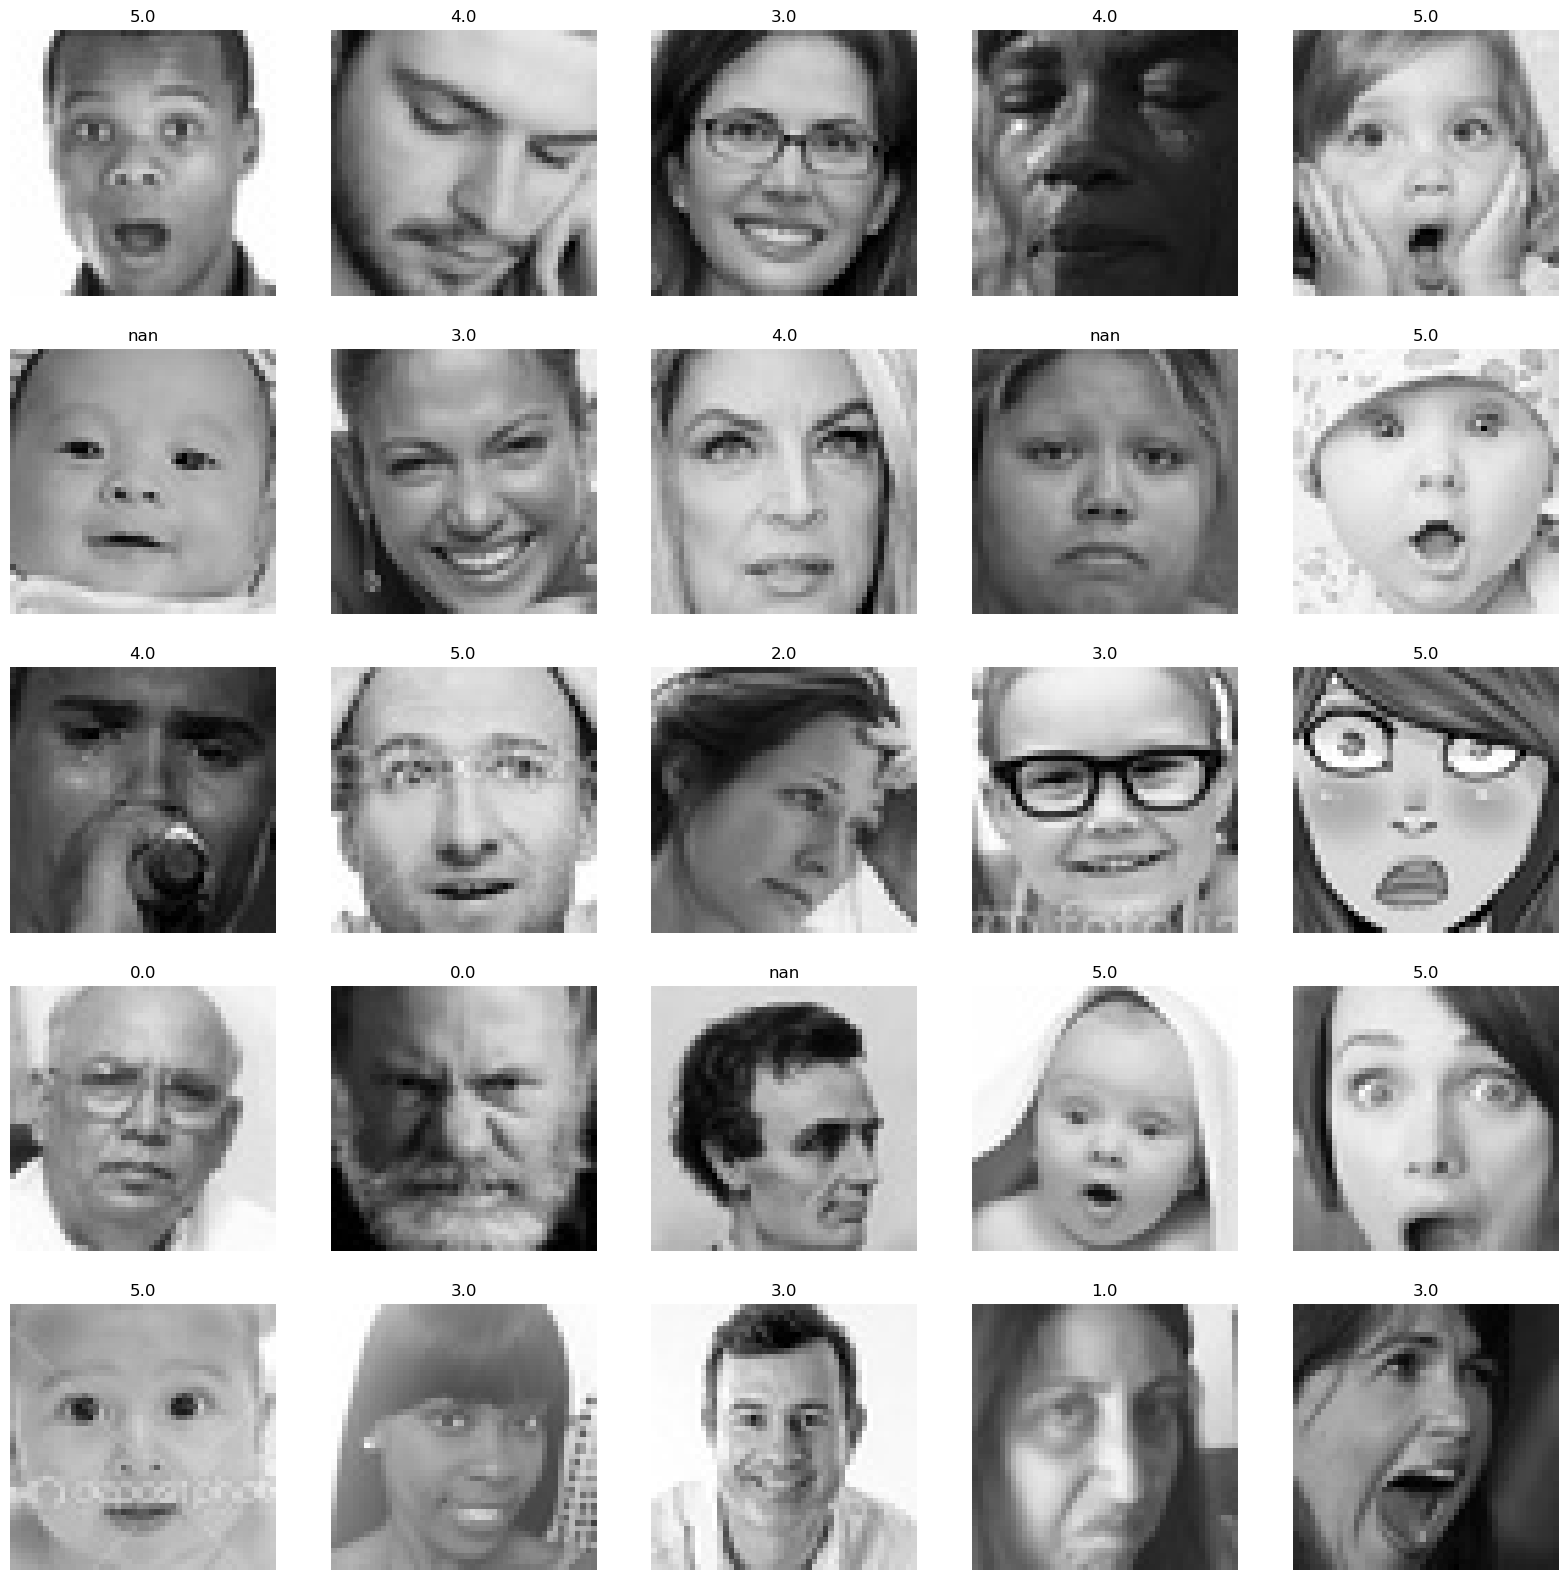

In [22]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

## Feature Extraction

In [23]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [25]:
from keras.preprocessing.image import img_to_array

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, target_size=(48, 48))
        img = img_to_array(img)
        features.append(img)
    return np.array(features)

train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [26]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [27]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [35]:
TEST_DIR = 'C:/Users/asus/Desktop/ml lab/archive/test/test'
test = pd.DataFrame()
test['image'] = [os.path.join(TEST_DIR, img) for img in os.listdir(TEST_DIR) if img.endswith('.png')]
test = test.sample(frac=1).reset_index(drop=True)
test_features = extract_features(test['image'])
test['label'] = test_labels
test = test.sample(frac=1).reset_index(drop=True)
test_features = extract_features(test['image'])
test['label'] = test_labels

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [38]:
y_test = np.array([1, 2, 3, 4, 5, 6])
y_test = to_categorical(y_test, num_classes=7)

In [39]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0.])

In [40]:
# config
input_shape = (48, 48, 1)
output_class = 7

## Model Creation

In [42]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
# output layer
model.add(Dense(output_class, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.add(Dense(output_class, activation='softmax'))

# compile the model with a tuple of metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=('accuracy', 'precision'))

# or compile the model with a dictionary of metrics with custom weights
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics={'accuracy': 0.5, 'precision': 0.5})

In [44]:
# import the Input class from the keras.layers module
from keras.layers import Input

# define the input layer
input_layer = Input(shape=(48*48,))

# add a hidden layer
hidden_layer = Dense(128, activation='relu')(input_layer)

# add a dropout layer to prevent overfitting
dropout_layer = Dropout(0.5)(hidden_layer)

# add the output layer
output_class = 7
output_layer = Dense(output_class, activation='softmax')(dropout_layer)

# define the model
model = Model(inputs=input_layer, outputs=output_layer)

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

NameError: name 'Model' is not defined

## Plot the Results

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

NameError: name 'history' is not defined

## Test with Image Data

In [6]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

NameError: name 'test' is not defined

In [7]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

NameError: name 'test' is not defined

In [8]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

NameError: name 'test' is not defined